In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split

#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv("../data/external/iot23_processed_offf.csv")

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.drop('detailed_label',axis = 1,inplace = True)
df.drop('id.resp_h_freq',axis = 1,inplace = True)

df.drop("conn_state_RSTO", axis=1, inplace=True)
df.drop("conn_state_RSTOS0", axis=1, inplace=True)
df.drop("conn_state_RSTR", axis=1, inplace=True)
df.drop("conn_state_RSTRH", axis=1, inplace=True)
df.drop("conn_state_S2", axis=1, inplace=True)
df.drop("conn_state_S3", axis=1, inplace=True)
df.drop("conn_state_SF", axis=1, inplace=True)
df.drop("conn_state_SH", axis=1, inplace=True)
df.drop("conn_state_SHR", axis=1, inplace=True)

In [ ]:
df["label"].value_counts()

label
1    1246770
0     197809
Name: count, dtype: int64

C:\Users\Infomedia\AppData\Local\Temp\ipykernel_20380\3651160071.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


<Axes: xlabel='label', ylabel='count'>

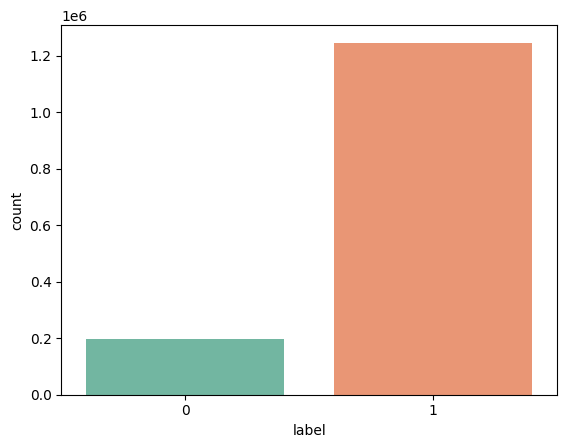

In [ ]:
sns.countplot(x='label', data=df, palette='Set2')

In [ ]:
df.shape

(1444579, 13)

In [ ]:
df.std()

id.orig_p         1.731189e+04
id.resp_p         2.242661e+04
duration          6.072477e+05
orig_bytes        1.714819e+06
resp_bytes        9.713450e+03
orig_pkts         7.230658e+04
resp_pkts         7.027782e+00
label             3.437756e-01
proto_tcp         1.951282e-01
conn_state_OTH    2.732155e-01
conn_state_REJ    4.332769e-02
conn_state_S0     2.952684e-01
conn_state_S1     5.642889e-03
dtype: float64

In [ ]:
df_train,df_test=train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
x = df_train.drop(["label"], axis=1)
y = df_train["label"].values

In [ ]:
x.shape

(1155663, 12)

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x.shape[1],)))

model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()
model.fit(x, y,batch_size=100,epochs=5)


c:\Users\Infomedia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,071 (39.34 KB)

 Trainable params: 10,071 (39.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
11557/11557 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.8223 - loss: 86.2067
Epoch 2/5
11557/11557 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.8647 - loss: 117.0164
Epoch 3/5
11557/11557 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8661 - loss: 23.2125
Epoch 4/5
11557/11557 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.8707 - loss: 66.8775
Epoch 5/5
11557/11557 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.8705 - loss: 1.5382


In [ ]:
x.columns

Index(['id.orig_p', 'id.resp_p', 'duration', 'orig_bytes', 'resp_bytes',
       'orig_pkts', 'resp_pkts', 'proto_tcp', 'conn_state_OTH',
       'conn_state_REJ', 'conn_state_S0', 'conn_state_S1'],
      dtype='object')

In [ ]:
x_norm= x[y == 0]

In [ ]:
x_norm.shape

(158460, 12)

In [ ]:
stds=x_norm.std()

In [ ]:
type(stds)

pandas.core.series.Series

In [ ]:
stds

id.orig_p         15363.445579
id.resp_p         16006.120979
duration          38551.442046
orig_bytes        36055.134588
resp_bytes        29323.384856
orig_pkts         36054.960659
resp_pkts            20.299619
proto_tcp             0.453341
conn_state_OTH        0.135594
conn_state_REJ        0.092244
conn_state_S0         0.285336
conn_state_S1         0.014430
dtype: float64

On calcule l’écart-type de chaque feature, puis on le réduit à 10% pour limiter l’intensité du bruit ajouté.

In [ ]:
stds=0.1*stds

In [ ]:
stds

id.orig_p         1536.344558
id.resp_p         1600.612098
duration          3855.144205
orig_bytes        3605.513459
resp_bytes        2932.338486
orig_pkts         3605.496066
resp_pkts            2.029962
proto_tcp            0.045334
conn_state_OTH       0.013559
conn_state_REJ       0.009224
conn_state_S0        0.028534
conn_state_S1        0.001443
dtype: float64

In [ ]:
import tensorflow as tf
#stddevs = tf.constant(stds)

La moyenne du bruit ajouté est fixée à zéro pour chaque feature → le bruit sera centré.

In [ ]:
mns=np.array([0,0,0,0,0,0,0,0,0,0,0,0])

Crée un bruit gaussien aléatoire avec moyenne = 0 et écart-type = 0.1 * std (défini plus haut).

Utilise un seed aléatoire pour la reproductibilité partielle.

In [ ]:

import random
def random_val():
    seed_value = random.randint(1,256)
    tf.random.set_seed(seed_value)
    random_noise=tf.random.normal(shape = (158460, 12), mean=mns, stddev=stds, dtype=tf.float64,  name=None)
    return random_noise


In [ ]:
x_norm1=pd.DataFrame(x_norm)
x_norm1.shape

(158460, 12)

In [ ]:
random_data = random_val()  # Call the random_val function to generate noise
random_noise = random_data.numpy()

In [ ]:
x_norm1 = pd.DataFrame(x_norm)  # Create a DataFrame from x_norm
print(x_norm1.shape)

(158460, 12)


In [ ]:
noised_data = x_norm1 + random_noise

In [ ]:
pseudo_label = model.predict(noised_data)

4952/4952 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step


In [ ]:
#pseudo_label = (pseudo_label > 0.5).astype(int)


In [ ]:
pseudo_labeled_data = pd.DataFrame(noised_data)


In [ ]:
pseudo_labeled_data = pd.DataFrame(noised_data)
pseudo_labeled_data['label'] = pseudo_label

In [ ]:
pseudo_labeled_data['label']

436498    0.870646
444482    0.870646
289224    0.870646
505555    0.870646
482926    0.870646
            ...   
528178    0.870646
273538    0.870646
527035    0.870646
486232    0.870646
732180    0.870646
Name: label, Length: 158460, dtype: float32

In [ ]:
pseudo_labeled_data

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1,label
436498,58951.413824,996.702870,300.830716,-1427.678559,-4399.468229,-3745.105745,5.471121,0.966121,0.006233,0.003749,0.996586,-0.002059,0.870646
444482,48066.903190,704.840724,3650.436272,-9780.135525,-411.238638,-1939.115381,0.941154,1.021492,-0.009665,-0.000704,1.052644,-0.000280,0.870646
289224,54103.758869,-471.274413,4890.869035,-2954.131454,-1894.206213,-1718.581438,2.618808,1.046550,0.020542,0.995248,-0.020267,0.001275,0.870646
505555,58982.751670,71.418785,-575.408275,-783.684473,1284.892849,-4687.493390,-2.675465,0.927385,-0.005872,0.000480,1.034511,0.001220,0.870646
482926,40902.066788,-1871.475855,1097.189476,2171.937285,806.354414,7047.482728,-1.939669,1.042535,-0.003169,0.007011,1.006279,0.001385,0.870646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528178,33665.843823,2410.584775,-3554.947563,1898.588395,839.804684,1214.665978,-2.155265,0.952371,0.000461,0.016074,1.023615,-0.000128,0.870646
273538,44711.465107,-1117.271600,-1844.543102,-1980.863899,4930.321678,-956.933086,2.111526,1.074586,0.002282,0.989897,0.028098,-0.001390,0.870646
527035,53469.112084,702.652578,2092.810432,-1427.633205,3128.419990,-116.324327,0.646203,1.046012,-0.026004,-0.004935,0.970697,0.002897,0.870646
486232,51474.212292,-494.013324,-485.302551,-9587.906380,204.248090,279.966771,3.659716,0.955517,-0.000397,0.007566,0.952734,0.002075,0.870646


In [ ]:
new_df = pseudo_labeled_data.loc[pseudo_labeled_data['label'] == 0]  # Select rows where labels == 0


In [ ]:
# Print the shape of the filtered DataFrame and the count of label 0 occurrences
print(new_df.shape[0])  # Print the number of rows with label 0
print(new_df['label'].value_counts())

15702
label
0.0    15702
Name: count, dtype: int64


In [ ]:
new_df["label"].value_counts()

label
0.0    15702
Name: count, dtype: int64

In [ ]:
def norm_data():
    random_data =random_val()
    random_noise=random_data.numpy()
    x_norm1=pd.DataFrame(x_norm)
    normal_labeled=x_norm1
    noised_data=normal_labeled+random_noise
    pseudo_label=model.predict(noised_data)
    pseudo_label = (pseudo_label > 0.5).astype(int)
    pseudo_labeled_data=pd.DataFrame(noised_data)
    pseudo_labeled_data['label']=pseudo_label
    pseudo_df1=pseudo_labeled_data.loc[pseudo_labeled_data['label'] == 0]
    return pseudo_df1

pseudo_df2=norm_data()
pseudo_df2.shape[0]

4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


27393

In [ ]:
pseudo_df2["label"].value_counts()

label
0    27393
Name: count, dtype: int64

In [ ]:
new_normal_df=pd.DataFrame(pseudo_df2)
print(new_normal_df.shape[0])
i=0
#while new_normal_df.shape[0] < 934971:
while i < 25:
    pseudo_df3=norm_data()
    print(pseudo_df3.shape[0])
    #new_normal_df=pseudo_df3.shape[0]
    new_normal_df = pd.concat([new_normal_df, pseudo_df3], ignore_index=True)
    combined_data = pd.concat([df_train,new_normal_df])
    print(new_normal_df.shape[0])
    i=i+1

print(i)
new_normal_df.shape[0]

27393
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
27276
54669
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27366
82035
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27298
109333
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27426
136759
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27307
164066
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
27150
191216
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27491
218707
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27613
246320
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
27372
273692
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27417
301109
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27419
328528
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
27351
355879
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
27027
382906
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
27369
410275
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step
27538
437813
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
27191
465004
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
27167
492171
4952/4952 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


710941

In [ ]:
df_train['label'].value_counts()

label
1    997203
0    158460
Name: count, dtype: int64

In [ ]:
combined_data["label"].value_counts()

label
1    997203
0    869401
Name: count, dtype: int64

In [ ]:
combined_data

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
1271215,5526.000000,37215.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,1.000000,0.000000,0.000000,1.000000,0.000000
1285616,5526.000000,37215.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,1.000000,0.000000,0.000000,1.000000,0.000000
436498,56872.000000,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,1.000000,0.000000,0.000000,1.000000,0.000000
444482,51236.000000,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,1.000000,0.000000,0.000000,1.000000,0.000000
1058006,63420.000000,23.000000,143302.138915,3525.226581,20.488061,2.000000,0.000000,1,1.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710936,24539.638223,539.368808,-5067.289036,-993.652991,267.986745,-4661.172276,-3.981149,0,1.013930,-0.000926,-0.010144,0.995094,-0.000498
710937,2297.915373,479.580585,268.465766,-1265.189221,7105.333598,6684.450876,3.226688,0,-0.034039,-0.001255,0.014218,-0.016461,-0.000916
710938,25326.243098,-1144.088676,-6206.639284,760.684902,1449.740038,-1600.692252,2.355055,0,1.018871,0.028438,0.007376,1.001724,0.002309
710939,2642.365765,-2362.074682,-898.316105,463.396974,-89.516704,-259.100410,0.714059,0,0.036365,0.011156,-0.001253,1.001828,0.001762


In [ ]:

combined_data.shape

(1866604, 13)

In [ ]:

combined_data['label'].value_counts()

label
1    997203
0    869401
Name: count, dtype: int64

In [ ]:
df.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06,1.444579e+06
mean,3.711580e+04,1.759908e+04,1.433021e+05,3.525227e+03,2.048806e+01,1.780337e+02,9.552264e-02,8.630681e-01,9.603532e-01,8.124789e-02,1.880825e-03,9.035055e-01,3.184319e-05
std,1.731189e+04,2.242661e+04,6.072477e+05,1.714819e+06,9.713450e+03,7.230658e+04,7.027782e+00,3.437756e-01,1.951282e-01,2.732155e-01,4.332769e-02,2.952684e-01,5.642889e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.415900e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,3.811400e+04,2.323000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,5.067200e+04,3.721500e+04,1.433021e+05,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,9.000000e+06,1.744830e+09,1.166102e+07,6.602735e+07,8.055000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
combined_data.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06
mean,3.114089e+04,1.109187e+04,8.788205e+04,2.869782e+03,7.880784e+02,-2.845415e+02,3.024536e-01,5.342338e-01,8.188653e-01,8.439858e-02,3.100050e-03,8.272216e-01,5.612829e-05
std,1.971918e+04,1.963743e+04,4.822044e+05,1.501312e+06,4.443303e+04,8.187887e+04,3.078124e+01,4.988268e-01,3.861116e-01,2.781328e-01,5.587889e-02,3.784681e-01,7.516804e-03
min,-6.908885e+03,-8.099182e+03,-1.983671e+04,-1.759311e+04,-1.366105e+04,-1.741483e+04,-1.010365e+01,0.000000e+00,-1.942783e-01,-6.360886e-02,-4.370962e-02,-1.264435e-01,-6.731916e-03
25%,1.757600e+04,2.200000e+01,-3.825331e+02,0.000000e+00,0.000000e+00,-2.043450e+02,0.000000e+00,0.000000e+00,9.770007e-01,0.000000e+00,0.000000e+00,9.840293e-01,0.000000e+00
50%,3.580400e+04,1.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,4.544700e+04,8.081000e+03,1.166583e+03,3.147493e+03,4.689134e+02,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.325719e-04,0.000000e+00,1.000000e+00,0.000000e+00
max,6.815437e+04,6.703873e+04,9.000000e+06,1.744830e+09,1.166889e+07,6.602735e+07,8.060087e+03,1.000000e+00,1.206040e+00,1.053910e+00,1.035103e+00,1.129620e+00,1.002381e+00


In [ ]:
X= combined_data.drop(["label"], axis=1)
Y = combined_data["label"].values
model.fit(X, Y,batch_size=100,epochs=2)

Epoch 1/2
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.9172 - loss: 83.0748
Epoch 2/2
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9162 - loss: 66.6947


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def report_heatmap(y_pred,y_test):

    # overall accuracy
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")

    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)

    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
x_vld= df_test.drop(["label"], axis=1)
y_vld = df_test["label"].values

9029/9029 ━━━━━━━━━━━━━━━━━━━━ 4s 485us/step
Overall Accuracy: 87.26%
--------------------------
              precision    recall  f1-score   support

           0       0.82      0.08      0.15     39349
           1       0.87      1.00      0.93    249567

    accuracy                           0.87    288916
   macro avg       0.85      0.54      0.54    288916
weighted avg       0.87      0.87      0.82    288916



C:\Users\Infomedia\AppData\Local\Temp\ipykernel_20380\2920541837.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


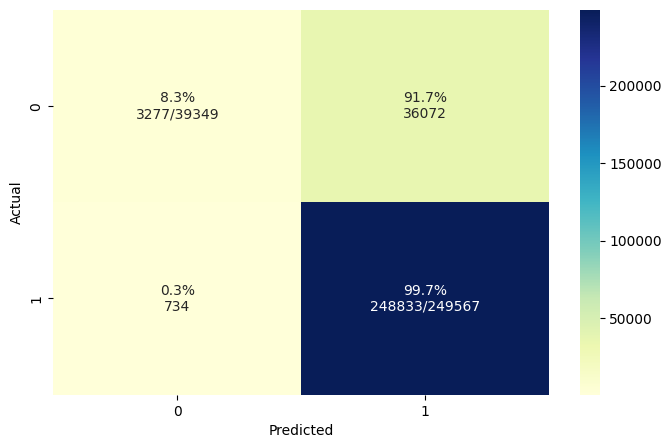

In [ ]:


y_pred_NN=(model.predict(x_vld)> 0.5)
report_heatmap(y_pred_NN,y_vld)

9029/9029 ━━━━━━━━━━━━━━━━━━━━ 5s 506us/step
Overall Accuracy: 67.73%
--------------------------
              precision    recall  f1-score   support

           0       0.29      0.92      0.44     39349
           1       0.98      0.64      0.77    249567

    accuracy                           0.68    288916
   macro avg       0.63      0.78      0.61    288916
weighted avg       0.89      0.68      0.73    288916



C:\Users\Infomedia\AppData\Local\Temp\ipykernel_20380\2920541837.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


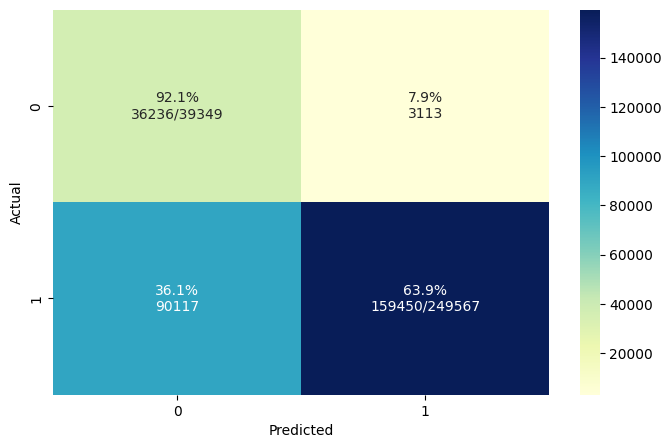

In [ ]:
y_pred_NN=(model.predict(x_vld)> 0.8)
report_heatmap(y_pred_NN,y_vld)

In [ ]:
combined_data.to_csv('../data/external/anomaly.csv')